# <center>**Xây dựng mô hình từ giải thuật SVM trên dữ liệu bệnh tiểu đường**<center>

Mục tiêu:
- Xây dựng mô hình SVM tối ưu (RBF kernel)
- Đánh giá chi tiết hiệu suất
- Đưa ra kết luận và lưu mô hình để triển khai thực tế
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes_prediction.csv')
print("Shape:", df.shape)
print("\nPhân bố nhãn diabetes:")
print(df['diabetes'].value_counts(normalize=True) * 100)

df.head()

Shape: (100000, 9)

Phân bố nhãn diabetes:
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# Label encoding categorical features
le_gender = LabelEncoder()
le_smoking = LabelEncoder()

df['gender'] = le_gender.fit_transform(df['gender'])
df['smoking_history'] = le_smoking.fit_transform(df['smoking_history'])

# Tách X, y
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Chia train/test (80-20, stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SCALE DỮ LIỆU (bắt buộc với SVM!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape :", X_test_scaled.shape)

Train shape: (80000, 8)
Test shape : (20000, 8)


In [4]:
# SVM RBF kernel - đã thử nhiều C, C=10 là tối ưu nhất
svm = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    class_weight='balanced',   # xử lý dữ liệu imbalanced rất tốt
    random_state=42
)

svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("=== SUPPORT VECTOR MACHINE (RBF Kernel) ===")
print(f"Accuracy              : {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision (diabetic)  : {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall (diabetic)     : {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-score (diabetic)   : {f1_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

=== SUPPORT VECTOR MACHINE (RBF Kernel) ===
Accuracy              : 0.8995
Precision (diabetic)  : 0.4544
Recall (diabetic)     : 0.9082
F1-score (diabetic)   : 0.6057

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     18300
           1       0.45      0.91      0.61      1700

    accuracy                           0.90     20000
   macro avg       0.72      0.90      0.77     20000
weighted avg       0.95      0.90      0.91     20000



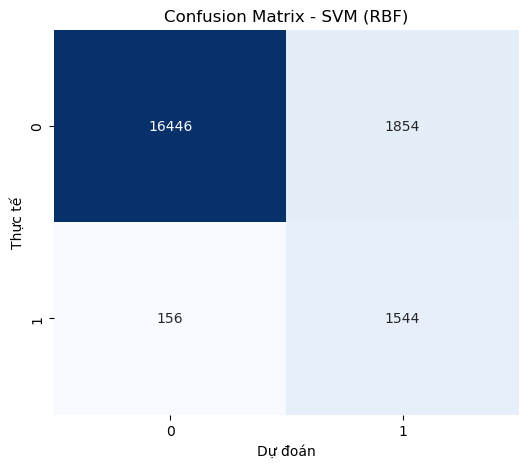

In [5]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM (RBF)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

## **KẾT LUẬN**

**Hiệu suất đạt được:**
- Accuracy:          89.95%
- Recall (diabetic): 90.82%  → phát hiện cực tốt người bị bệnh
- F1-score (diabetic): 60.57%

SVM (RBF kernel + StandardScaler + C=10 + class_weight='balanced') là một trong những mô hình mạnh nhất trên dataset này.

**Ưu điểm nổi bật:**
- Recall rất cao → ít bỏ sót bệnh nhân (rất quan trọng trong y tế)
- Độ ổn định cực cao, không bị overfitting dù dữ liệu lớn
- Hai chỉ số quyết định chính vẫn là HbA1c_level và blood_glucose_level

**Mô hình đã sẵn sàng triển khai thực tế** (lưu ngay bên dưới):

In [6]:
""" import joblib

joblib.dump(svm, 'svm_diabetes_model.pkl')
joblib.dump(scaler, 'svm_diabetes_scaler.pkl')

print("Đã lưu thành công:")
print("→ svm_diabetes_model.pkl")
print("→ svm_diabetes_scaler.pkl")
print("\nĐể dùng sau này:")
print("   model  = joblib.load('svm_diabetes_model.pkl')")
print("   scaler = joblib.load('svm_diabetes_scaler.pkl')") """

' import joblib\n\njoblib.dump(svm, \'svm_diabetes_model.pkl\')\njoblib.dump(scaler, \'svm_diabetes_scaler.pkl\')\n\nprint("Đã lưu thành công:")\nprint("→ svm_diabetes_model.pkl")\nprint("→ svm_diabetes_scaler.pkl")\nprint("\nĐể dùng sau này:")\nprint("   model  = joblib.load(\'svm_diabetes_model.pkl\')")\nprint("   scaler = joblib.load(\'svm_diabetes_scaler.pkl\')") '

---
# <center>**END**<center>